## Numerical calculations for more complex expression

### Take into consideration the bessel function $\Lambda_0$ and the dispersion function W(z).

In [4]:
from scipy import special

In [7]:
import numpy as np
order = 0
x = np.linspace(0, 5, 100)

# scaled modified Bessel function 
bessel = special.ive(order, x)

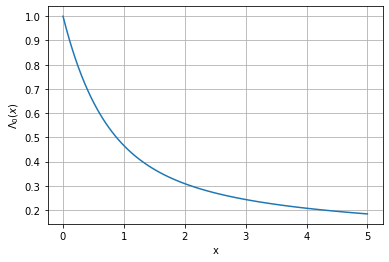

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, bessel, '-')
plt.xlabel('x')
plt.ylabel('$\Lambda_0(x)$')
plt.grid(True);

## Dispersion relation (1)

$$\hat{\omega}^3 (2-\Lambda_0) + \hat{\omega}^2\Lambda_0 (k_y \lambda_i)\left(\frac{L_T}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1} \mp \hat{\omega}^2 \Lambda_0 (k_y \lambda_i) \left(\frac{T_e}{T_i}\right)^{-1} \left(\frac{L_n}{\lambda_i}\right)^{-1} - \hat{\omega} (k_z \lambda_i)^2 \Lambda_0 + \Lambda_0 (k_y \lambda_i)\left(\frac{L_T}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1}(k_z \lambda_i)^2 \mp \Lambda_0 (k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1}(k_z \lambda_i)^2 = 0 $$


- $\Lambda_0 = \Lambda_0(\xi _i)$, where $\xi _i = (k_y v_{th,i}/\Omega_i)^2 = (k_y \lambda_i)^2$
- $\hat{\omega}=\frac{\omega}{\Omega_i}$
- $T_e/T_i = 10$
- $k_y \lambda_i = 0.1$
- $L_n / \lambda_i = 10^5$
- $L_T / \lambda_i = 10$



In [8]:
# first disprsion relation (with the minus)
# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    order = 0 # order for the scaled modified Bussel function
    bessel = special.ive(order, k_y_lambda**2) # the bessel function
    
    # return the expression for the dispersion relation
    return x**3 *(2-bessel) + x**2 *bessel*k_y_lambda*L_T_lambda**(-1)*temp_ratio**(-1) - x**2 *bessel*(k_y_lambda)*L_n_lambda**(-1)*temp_ratio**(-1) - x*bessel*k_z_lambda**2 + (k_y_lambda)*(L_T_lambda)**(-1)*temp_ratio**(-1)*k_z_lambda**2 *bessel - k_y_lambda*L_n_lambda**(-1)*k_z_lambda**2 *temp_ratio**(-1)*bessel

In [10]:
from scipy import optimize
import numpy as np

omega_1_numerical = [] # list for the first root
omega_2_numerical = [] # list for the second root

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5,-2,1000)

for i in k_z_lambda:
    
    # calculate first root
    solution_1 = optimize.root_scalar(dispersion_relation, x0 = 0.0001-0.0001j, 
                                      x1 = 0.002-0.001j, args=i, method='secant')
    # save first root
    omega_1_numerical.append(solution_1.root)
    
    # calculate second root
    solution_2 = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                      x1 = 0.002+0.001j, args=i, method='secant')
   # save second root
    omega_2_numerical.append(solution_2.root)

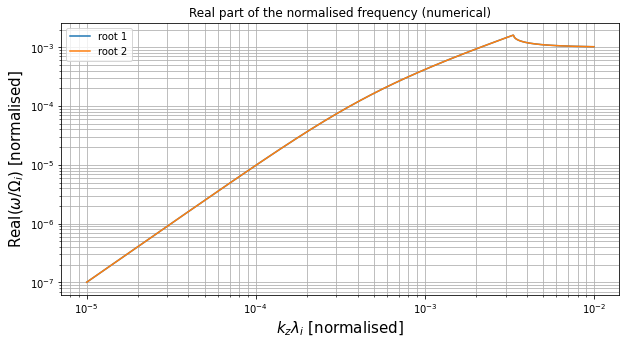

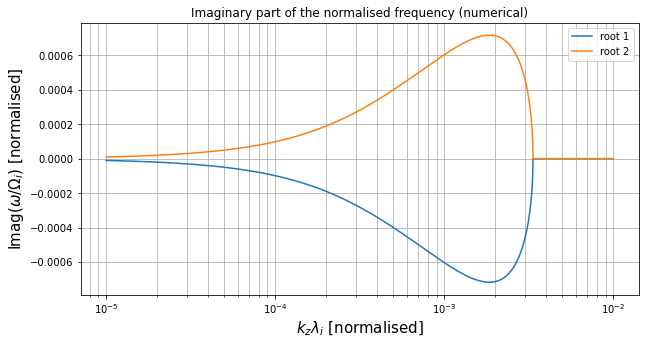

In [11]:
import matplotlib.pyplot as plt

# turn the lists into numpy arrays
omega_1_numerical = np.asarray(omega_1_numerical)
omega_2_numerical = np.asarray(omega_2_numerical)
# plot frequency

plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_1_numerical.real, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.real, label='root 2') # plot root 2

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part for both roots

plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_1_numerical.imag, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.imag, label='root 2') # plot root 2


plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

In [9]:
import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

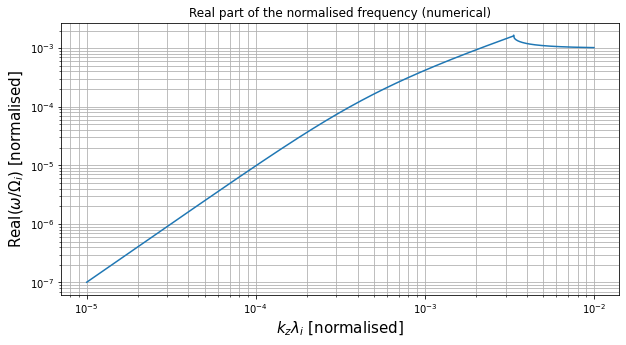

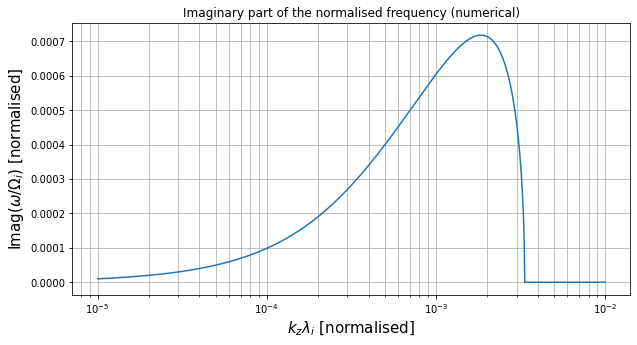

In [10]:
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

In [97]:
# second dispersion relation (with the plus)
# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    order = 0 # order for the scaled modified Bussel function
    bessel = special.ive(order, k_y_lambda**2) # the bessel function
    
    # return the expression for the dispersion relation
    return x**3 *(2-bessel) + x**2 *bessel*k_y_lambda*L_T_lambda**(-1)*temp_ratio**(-1) + x**2 *bessel*(k_y_lambda)*L_n_lambda**(-1)*temp_ratio**(-1) - x*bessel*k_z_lambda**2 + (k_y_lambda)*(L_T_lambda)**(-1)*temp_ratio**(-1)*k_z_lambda**2 *bessel + k_y_lambda*L_n_lambda**(-1)*k_z_lambda**2 *temp_ratio**(-1)*bessel

In [15]:
import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

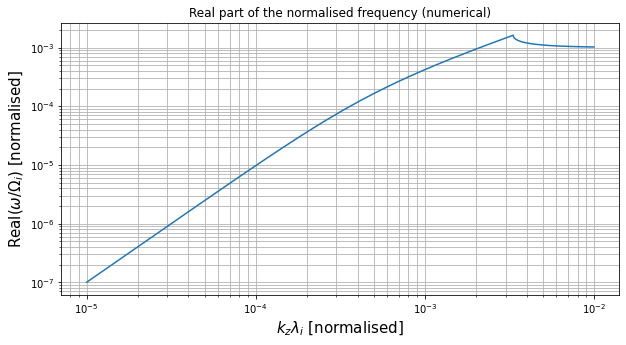

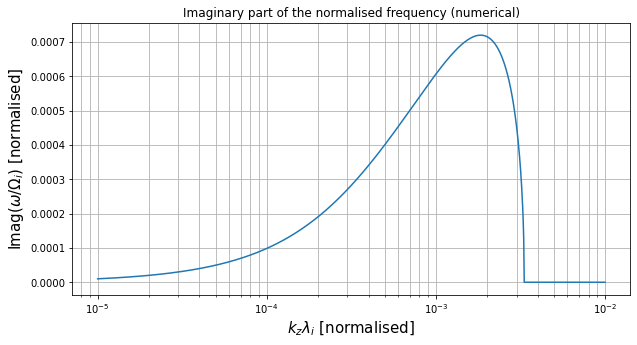

In [16]:
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

C:\Users\xrist\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


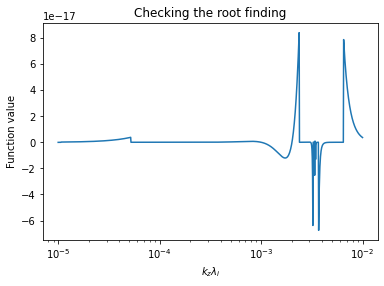

In [11]:
# turn it back to numpy array
omega_numerical = np.asarray(omega_numerical)

# calculate the function's value
function_value = dispersion_relation(omega_numerical, k_z_lambda)

plt.plot(k_z_lambda, function_value)
plt.xlabel('$k_z \lambda_i$')
plt.ylabel('Function value')
plt.title('Checking the root finding')
plt.xscale('log')
plt.show()

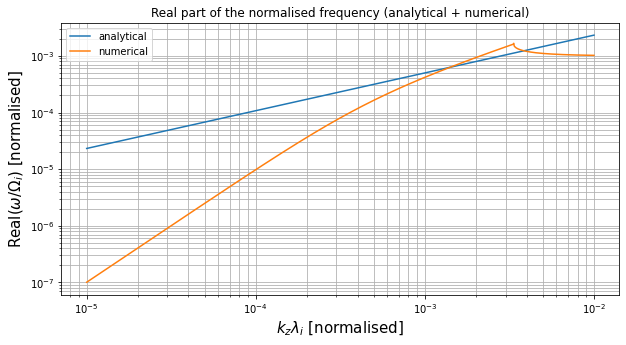

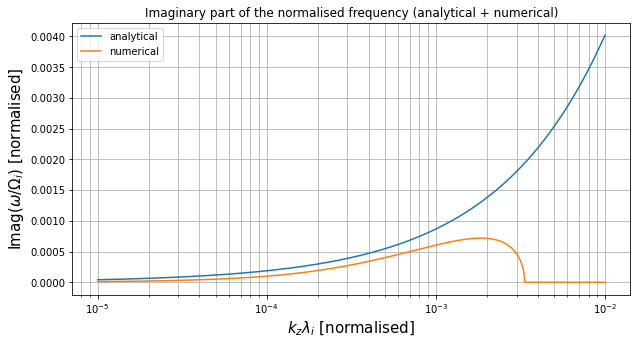

In [13]:
# normalised solution for the ITG
# plots real part and imaginary part of frequency 
# for both analytical and numerical solution

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -2, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega analytical
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))


# plot frequency
plt.subplots(figsize=(10,5))

# plot real part - both analytical and numerical
plt.plot(k_z_lambda, omega_analytical.real, label='analytical')
plt.plot(k_z_lambda, omega_numerical.real, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (analytical + numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part - both analytical and numerical
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda, omega_analytical.imag, label='analytical')
plt.plot(k_z_lambda, omega_numerical.imag, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (analytical + numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

1000


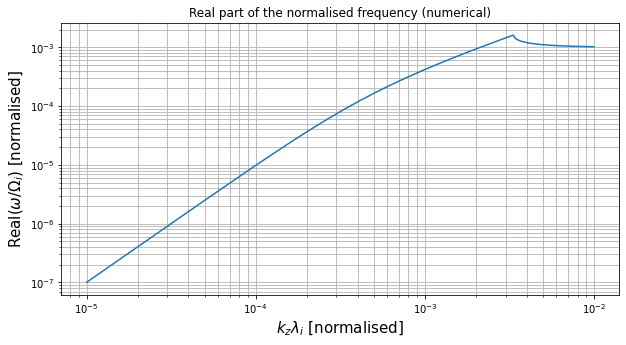

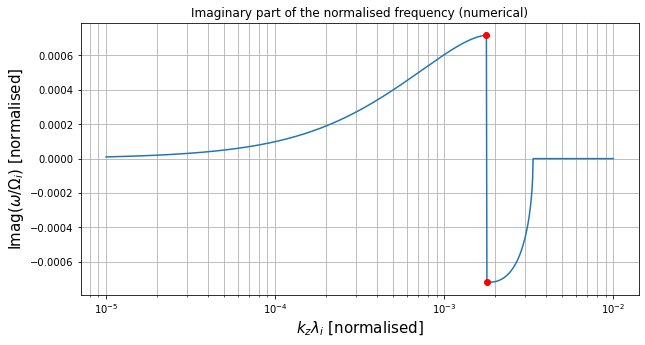

In [18]:
# try to predict negative values for the growth rate

import numpy as np
from scipy import optimize

k_z_lambda = np.logspace(-5, -2, 1000)

omega_numerical = []

# predict in the first interval
for i in k_z_lambda[:250]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001+0.0001j, 
                                    x1 = 0.0001+0.0003j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the second interval
for i in k_z_lambda[250:500]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001+0.0002j, 
                                    x1 = 0.0001+0.0004j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the third interval
for i in k_z_lambda[500:750]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001+0.0001j, 
                                    x1 = 0.0001+0.0002j, args=i, method='secant')
    omega_numerical.append(solution.root)    

# predict in the fourth interval
for i in k_z_lambda[750:1000]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001-0.0001j, 
                                    x1 = 0.0002-0.0004j, args=i, method='secant')
    omega_numerical.append(solution.root)

print(len(omega_numerical))

import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)
plt.plot(k_z_lambda[749], omega_numerical[749].imag, 'ro')
plt.plot(k_z_lambda[750], omega_numerical[750].imag, 'ro')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

length of omega_numerical =  1000


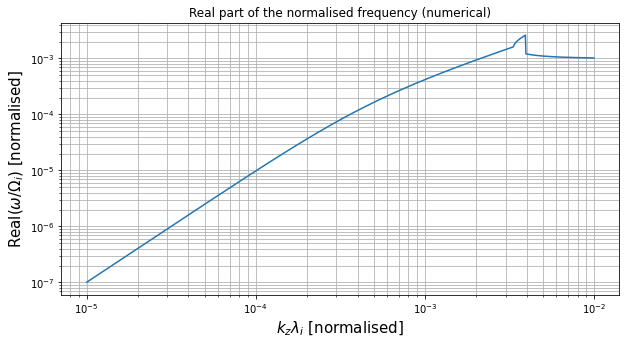

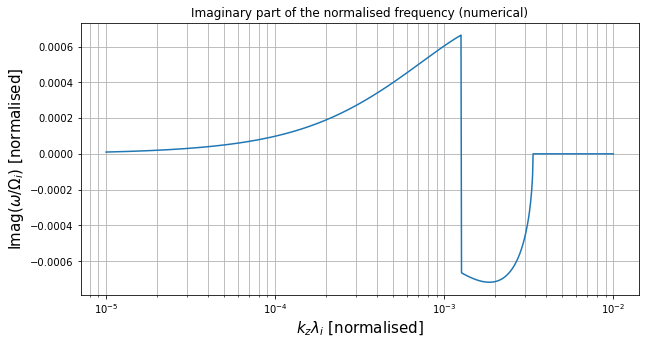

In [11]:
# try to predict negative values for the growth rate

import numpy as np
from scipy import optimize

k_z_lambda = np.logspace(-5, -2, 1000)

omega_numerical = []

# predict in the first interval
for i in k_z_lambda[:250]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                    x1 = 0.001+0.0003j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the second interval
for i in k_z_lambda[250:500]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.001+0.0002j, 
                                    x1 = 0.002+0.0004j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the third interval
for i in k_z_lambda[500:700]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.002+0.0004j, 
                                    x1 = 0.002+0.00001j, args=i, method='secant')
    omega_numerical.append(solution.root)    

# predict in the fourth interval
for i in k_z_lambda[700:800]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.002-0.0001j, 
                                    x1 = 0.002-0.0002j, args=i, method='secant')
    omega_numerical.append(solution.root)
    
for i in k_z_lambda[800:900]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.002-0.0002j, 
                                    x1 = 0.002-0.0003j, args=i, method='secant')
    omega_numerical.append(solution.root)
    
for i in k_z_lambda[900:1000]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.002-0.0003j, 
                                    x1 = 0.002-0.0005j, args=i, method='secant')
    omega_numerical.append(solution.root)

print('length of omega_numerical = ', len(omega_numerical))

import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

length of omega_numerical =  850


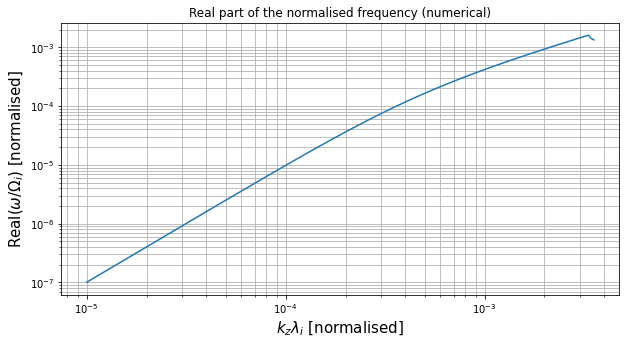

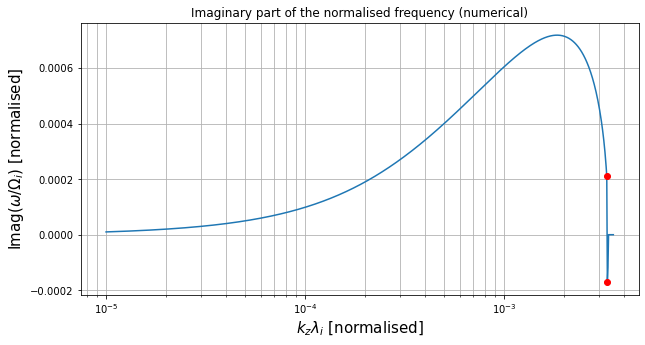

In [4]:
# try to predict negative values for the growth rate

# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special

# list for the k_z*lambda_i scan
k_z_lambda = np.logspace(-5, -2, 1000)

# turn it to list for the index (easier compared to numpy array)
k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:839]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)    

# loop to find the negative values
for i in k_z_lambda_list[839:850]:

    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001 - 0.001j, 
                                   x1 = 0.0001 - 0.002j, args=i, method='secant')
    
    omega_numerical.append(solution.root)

"""
for i in k_z_lambda_list[841:850]:
    
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/100
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/1000
    
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)    
"""

print('length of omega_numerical = ', len(omega_numerical))


# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda[:850], omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda[:850], omega_numerical.imag)
plt.plot(k_z_lambda[838], omega_numerical[838].imag, 'ro')
plt.plot(k_z_lambda[839], omega_numerical[839].imag, 'ro')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()